<a href="https://colab.research.google.com/github/ValentinBarco/MachineLearning/blob/main/Clasificador%20de%20amorfismo%20en%20esperma/Clasificaci%C3%B3n_de_amorfimo_en_esperma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Prueba si el programa lee correctamente la imagen


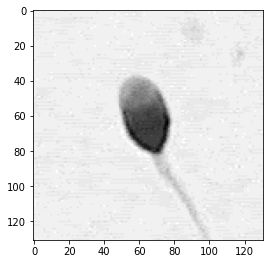

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_normal     = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal/image_001.BMP',0)

plt.figure(figsize=(14,14))
plt.subplot(1,3,2)
plt.imshow(img_normal,cmap='gray')



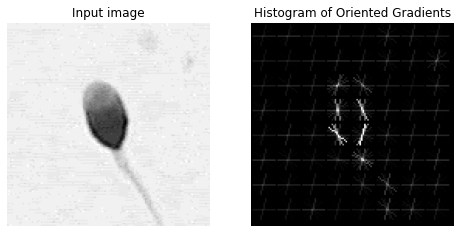

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.transform import resize
from skimage import exposure
from skimage.io import imshow
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal/image_001.BMP',0)

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

##Cargo los Datasets con las imagenes

In [ ]:

Normal = '/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal'
GoodSperm_Training = []
Normal_Training = []

for img in os.listdir(Normal):
  img = cv2.imread(os.path.join(Normal,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(18, 18),cells_per_block=(2, 2), multichannel=True)
  fd = fd/fd.max()
  #fd = exposure.rescale_intensity(fd, in_range= (0,5));
  GoodSperm_Training.append(fd)
  Normal_Training.append(fd)


In [ ]:
Tapered = '/content/drive/MyDrive/Colab Notebooks/HuSHem/02_Tapered'
BadSperm_Training = []
Tapered_Training = []

for img in os.listdir(Tapered):
  img = cv2.imread(os.path.join(Tapered,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(18, 18),cells_per_block=(2, 2), multichannel=True)
  fd = fd/fd.max()
  #fd = exposure.rescale_intensity(fd, in_range= (0,5));
  BadSperm_Training.append(fd)
  Tapered_Training.append(fd)

In [ ]:
Pyriform = '/content/drive/MyDrive/Colab Notebooks/HuSHem/03_Pyriform'
Pyriform_Training = []


for img in os.listdir(Pyriform):
  img = cv2.imread(os.path.join(Pyriform,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(18, 18),cells_per_block=(2, 2), multichannel=True)
  fd = fd/fd.max()
  #fd = exposure.rescale_intensity(fd, in_range= (0,5));
  BadSperm_Training.append(fd)
  Pyriform_Training.append(fd)

In [ ]:
Amorphous = '/content/drive/MyDrive/Colab Notebooks/HuSHem/04_Amorphous'
Amorphous_Training = []


for img in os.listdir(Amorphous):
  img = cv2.imread(os.path.join(Amorphous,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(18, 18),cells_per_block=(2, 2), multichannel=True)
  fd = fd/fd.max()
  #fd = exposure.rescale_intensity(fd, in_range= (0,5));
  BadSperm_Training.append(fd)
  Amorphous_Training.append(fd)

##Asignacion de los targets



1.   Esperma de buena calidad
2.   Esperma de mala calidad









In [ ]:
import pandas as pd

Data_GoodSperm = pd.DataFrame(GoodSperm_Training)
target_GoodSperm = pd.DataFrame([1]*len(Data_GoodSperm))
Data_BadSperm = pd.DataFrame(BadSperm_Training)
target_BadSperm = pd.DataFrame([2]*len(Data_BadSperm))


Dataset = pd.concat([Data_GoodSperm ,Data_BadSperm],ignore_index= True,axis=0)
target = pd.concat([target_GoodSperm, target_BadSperm],ignore_index= True,axis=0)

target.head

<bound method NDFrame.head of      0
0    1
1    1
2    1
3    1
4    1
..  ..
211  2
212  2
213  2
214  2
215  2

[216 rows x 1 columns]>

#Modelo: K Vecinos mas cercanos

###Calculo de n_vecinos para mayor presicion

In [ ]:
Data_GoodSperm.head

<bound method NDFrame.head of         0         1         2     ...      2805      2806      2807
0   0.563551  0.063128  0.254100  ...  0.294606  0.153508  0.162718
1   0.311001  0.106030  0.090472  ...  0.179520  0.081390  0.173471
2   0.116415  0.047726  0.066515  ...  0.251821  0.132004  0.120729
3   0.526702  0.302761  0.561153  ...  0.262264  0.153752  0.255549
4   0.694236  0.198246  0.339524  ...  0.189466  0.117595  0.269019
5   0.514201  0.230076  0.369809  ...  0.244606  0.313121  0.150478
6   0.434564  0.232277  0.409771  ...  0.224779  0.292317  0.250850
7   0.571163  0.112316  0.378663  ...  0.270425  0.173641  0.187241
8   0.570877  0.157821  0.368880  ...  0.252146  0.247569  0.202968
9   0.516252  0.181037  0.394004  ...  0.103334  0.028047  0.128866
10  0.413378  0.211166  0.506271  ...  0.246928  0.197417  0.197406
11  0.648533  0.184230  0.456200  ...  0.351177  0.410609  0.352652
12  0.428776  0.102365  0.284946  ...  0.200760  0.142398  0.105961
13  0.606053  0.14

In [ ]:
#Importacion de librerias

from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

#Separacion entre datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, random_state=3)

In [ ]:
for n in range(1,10):
  Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=n)
  Kvecinos.fit(X_train, y_train)
  y_pred = Kvecinos.predict(X_test)
  Score = precision_score(y_test, y_pred, average='micro')
  print("La Presicion del Modelo con " + str(n) + " vecinos es:",Score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 1 vecinos es: 0.75
La Presicion del Modelo con 2 vecinos es: 0.6590909090909091
La Presicion del Modelo con 3 vecinos es: 0.7727272727272727


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 4 vecinos es: 0.7727272727272727
La Presicion del Modelo con 5 vecinos es: 0.7954545454545454
La Presicion del Modelo con 6 vecinos es: 0.7954545454545454


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 7 vecinos es: 0.75
La Presicion del Modelo con 8 vecinos es: 0.7045454545454546
La Presicion del Modelo con 9 vecinos es: 0.75


##Entrenamiento del Modelo con el N optimo

In [ ]:
## Como podemos notar el modelo tiene mas presicion con n = 7

X_train, X_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, random_state=3)

Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=7)
Kvecinos.fit(X_train, y_train)

y_pred_Kvecinos = Kvecinos.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#Matriz de Confusion

Precision: 0.75
Exactitud: 0.75
Sensibilidad: 0.59375
Puntaje: 0.75


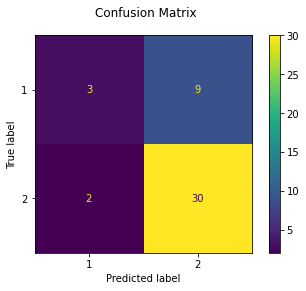

In [ ]:
disp = metrics.plot_confusion_matrix(Kvecinos, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix");



from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Precision = precision_score(y_test, y_pred_Kvecinos, average='micro')
Exactitud = accuracy_score(y_test,y_pred_Kvecinos)
Sensibilidad = recall_score(y_test,y_pred_Kvecinos,average='macro')
Puntaje = f1_score(y_test,y_pred_Kvecinos,average = 'micro')
print('Precision: '+ str(Precision))
print('Exactitud: '+ str(Exactitud))
print('Sensibilidad: '+ str(Sensibilidad))
print('Puntaje: '+ str(Puntaje))

#Modelo: Support Vector Machine

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(Dataset, target, shuffle = True, test_size=0.15, random_state=1)

Vector = svm.SVC(kernel = 'linear')
Vector.fit(X_train, y_train)

y_pred_Vector = Vector.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision: 0.7878787878787878


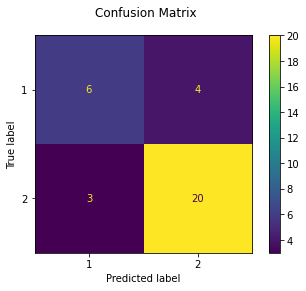

In [ ]:
disp = metrics.plot_confusion_matrix(Vector, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")


Precision = precision_score(y_test, y_pred_Vector, average='micro')


print('Precision: '+ str(Precision))


#Modelo: Arbol de Decision


In [ ]:
from sklearn.tree import DecisionTreeClassifier


Arbol = DecisionTreeClassifier(criterion = 'entropy')
Arbol.fit(X_train, y_train)
y_pred_Arbol = Arbol.predict(X_test)

Precision: 0.6060606060606061


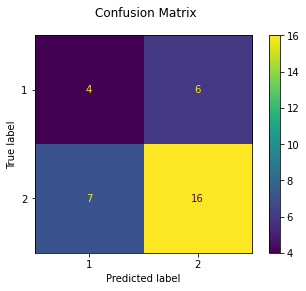

In [ ]:
from sklearn.metrics import precision_score
disp = metrics.plot_confusion_matrix(Arbol, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

Precision = precision_score(y_test, y_pred_Arbol, average='micro')
print('Precision: '+ str(Precision))

#Modelo: Bosque Aleatorio de Clasificacion

In [ ]:

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(Dataset, target, shuffle = True, test_size=0.15, random_state=1)

Bosque = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
Bosque.fit(X_test,y_test);
y_pred_Bosque = Bosque.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Precision: 1.0


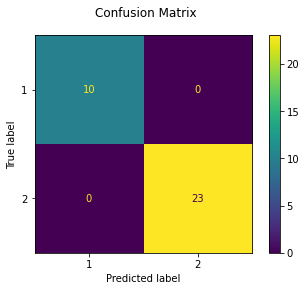

In [ ]:
disp = metrics.plot_confusion_matrix(Bosque, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

Precision = precision_score(y_test, y_pred_Bosque, average='micro')
print('Precision: '+ str(Precision))

#Modelo: Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Dataset, target, shuffle = True, test_size=0.1, random_state=1)
from sklearn.naive_bayes import GaussianNB

Bayes = GaussianNB()
Bayes.fit(X_train, y_train)

y_pred_Bayes = Bayes.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision: 0.7272727272727273


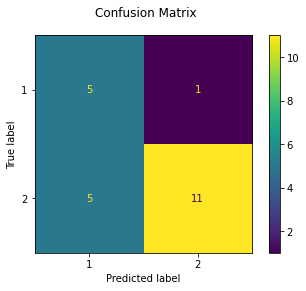

In [ ]:
from sklearn.metrics import precision_score
disp = metrics.plot_confusion_matrix(Bayes, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

Precision = precision_score(y_test, y_pred_Bayes, average='micro')
print('Precision: '+ str(Precision))

In [ ]:
Data_Tapered = pd.DataFrame(Tapered_Training)
target_Tapered = pd.DataFrame([1]*len(Data_Tapered))
Data_Pyriform = pd.DataFrame(Pyriform_Training)
target_Pyriform =pd.DataFrame([2]*len(Data_Pyriform))
Data_Amorphous = pd.DataFrame(Amorphous_Training)
target_Amorphous =pd.DataFrame([3]*len(Data_Amorphous))

DatasetTipo = pd.concat([Data_Tapered, Data_Pyriform, Data_Amorphous],ignore_index= True,axis=0)
targetTipo = pd.concat([target_Tapered , target_Pyriform, target_Amorphous],ignore_index= True,axis=0)

target.head

<bound method NDFrame.head of      0
0    1
1    1
2    1
3    1
4    1
..  ..
211  2
212  2
213  2
214  2
215  2

[216 rows x 1 columns]>

#Modelo: K Vecinos mas cercanos

###Calculo de n_vecinos para mayor presicion

In [ ]:
#Separacion entre datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(DatasetTipo, targetTipo, test_size=0.15, random_state=3)

for n in range(1,10):
  Kvecinos_Tipo = neighbors.KNeighborsClassifier(n_neighbors=n)
  Kvecinos_Tipo.fit(X_train, y_train)
  y_pred = Kvecinos_Tipo.predict(X_test)
  Score = precision_score(y_test, y_pred, average='micro')
  print("La Presicion del Modelo con " + str(n) + " vecinos es:",Score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Data

La Presicion del Modelo con 1 vecinos es: 0.52
La Presicion del Modelo con 2 vecinos es: 0.6
La Presicion del Modelo con 3 vecinos es: 0.64
La Presicion del Modelo con 4 vecinos es: 0.56
La Presicion del Modelo con 5 vecinos es: 0.6
La Presicion del Modelo con 6 vecinos es: 0.6
La Presicion del Modelo con 7 vecinos es: 0.64
La Presicion del Modelo con 8 vecinos es: 0.68
La Presicion del Modelo con 9 vecinos es: 0.72


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


##Entrenamiento del Modelo con el N optimo

In [ ]:
## Como podemos notar el modelo tiene mas presicion con n = 7

X_train, X_test, y_train, y_test = train_test_split(DatasetTipo, targetTipo, test_size=0.15, random_state=3)

Kvecinos_Tipo = neighbors.KNeighborsClassifier(n_neighbors=9)
Kvecinos_Tipo.fit(X_train, y_train)

y_pred = Kvecinos_Tipo.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#Matiz de Confusion

Precision: 0.72
Exactitud: 0.72
Sensibilidad: 0.6777777777777777
Puntaje: 0.72


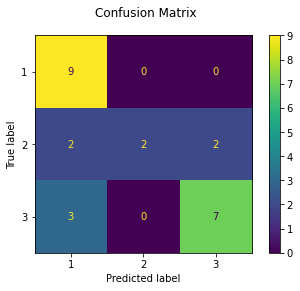

In [ ]:
disp = metrics.plot_confusion_matrix(Kvecinos_Tipo, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix");



from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Precision = precision_score(y_test, y_pred, average='micro')
Exactitud = accuracy_score(y_test,y_pred)
Sensibilidad = recall_score(y_test,y_pred,average='macro')
Puntaje = f1_score(y_test,y_pred,average = 'micro')
print('Precision: '+ str(Precision))
print('Exactitud: '+ str(Exactitud))
print('Sensibilidad: '+ str(Sensibilidad))
print('Puntaje: '+ str(Puntaje))

#Modelo: Support Vector Machine

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


Vector_Tipo= svm.SVC(kernel = 'linear')
Vector_Tipo.fit(X_train, y_train)

y_pred = Vector_Tipo.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision: 0.68


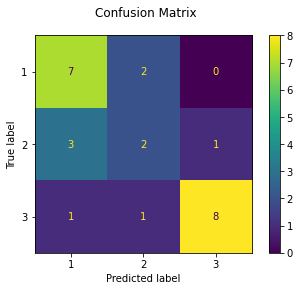

In [ ]:
disp = metrics.plot_confusion_matrix(Vector_Tipo, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")


Precision = precision_score(y_test, y_pred, average='micro')


print('Precision: '+ str(Precision))

#Modelo: Arbol de Decision

Precision: 0.48


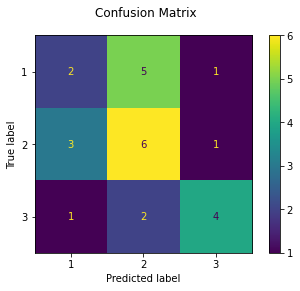

In [ ]:
from sklearn.tree import DecisionTreeClassifier


Arbol_Tipo = DecisionTreeClassifier(criterion = 'entropy')
Arbol_Tipo.fit(X_train, y_train)
y_pred = Arbol_Tipo.predict(X_test)

from sklearn.metrics import precision_score
disp = metrics.plot_confusion_matrix(Arbol_Tipo, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

Precision = precision_score(y_test, y_pred, average='micro')
print('Precision: '+ str(Precision))

#Modelo: Bosque Aleatorio de Clasificacion

In [ ]:

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(DatasetTipo, targetTipo, shuffle = True, test_size=0.15, random_state=1)

Bosque_Tipo = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
Bosque_Tipo.fit(X_test,y_test);
y_pred = Bosque_Tipo.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Precision: 1.0


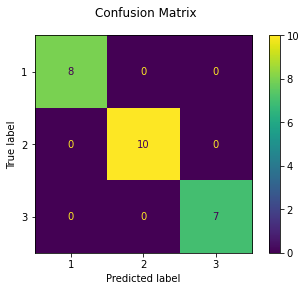

In [ ]:
disp = metrics.plot_confusion_matrix(Bosque_Tipo, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

Precision = precision_score(y_test, y_pred, average='micro')
print('Precision: '+ str(Precision))

#Modelo: Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Bayes_Tipo = MultinomialNB()
Bayes_Tipo.fit(X_train, y_train)

y_pred = Bayes_Tipo.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision: 0.68


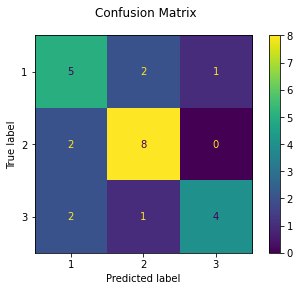

In [ ]:
from sklearn.metrics import precision_score
disp = metrics.plot_confusion_matrix(Bayes_Tipo, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

Precision = precision_score(y_test, y_pred, average='micro')
print('Precision: '+ str(Precision))

#Programa de clasificacion

In [ ]:
EsNormal = 0
EsAnormal = 0
EsTapered = 0
EsPyriform = 0
EsAmorphous = 0
prueba = []
imagen1   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal/image_001.BMP',0)
imagen2   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal/image_001.BMP',0)
imagen3   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/02_Tapered/image_002.BMP',0)
imagen4   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/02_Tapered/image_002.BMP',0)
imagen5   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/03_Pyriform/image_009.BMP',0)
imagen6   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/03_Pyriform/image_005.BMP',0)
imagen7   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/04_Amorphous/image_007.BMP',0)
imagen8   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/04_Amorphous/image_005.BMP',0)
imagenes = [imagen1, imagen2, imagen3, imagen4,imagen5,imagen6,imagen7,imagen8]
for i in range(0,len(imagenes)):
  imagen = cv2.resize(imagenes[i],(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(imagen, orientations=9, pixels_per_cell=(18, 18),cells_per_block=(2, 2), multichannel=False)
  fd = fd/fd.max()
  prueba.append(fd)
Data = pd.DataFrame(prueba)

PrediccionKvecinos = Kvecinos.predict(Data)
PrediccionVectorSM = Vector.predict(Data)
PrediccionArbolDC = Arbol.predict(Data)
PrediccionBosqueAC = Bosque.predict(Data)
PrediccionBayesC = Bayes.predict(Data)

Predicciones = [PrediccionKvecinos,PrediccionVectorSM,PrediccionBosqueAC,PrediccionBayesC]

for j in range(Data.index.start,Data.index.stop):
  for pred in range(0,4):
    if Predicciones[pred][j] == 1:
      EsNormal = EsNormal + 1
    else:
      EsAnormal = EsAnormal + 1
  if EsNormal > EsAnormal:
    print('Es normal')
  else:
    PrediccionKvecinos_Tipo = Kvecinos_Tipo.predict(Data)
    PrediccionVectorSM_Tipo = Vector_Tipo.predict(Data)
    PrediccionArbolDC_Tipo = Arbol_Tipo.predict(Data)
    PrediccionBosqueAC_Tipo = Bosque_Tipo.predict(Data)
    PrediccionBayesC_Tipo = Bayes_Tipo.predict(Data)
    PrediccionesTipo = [PrediccionKvecinos_Tipo[j],PrediccionVectorSM_Tipo[j], PrediccionBosqueAC_Tipo[j],PrediccionBayesC_Tipo[j]]
    for pred in range(0,4):
      if PrediccionesTipo[pred] == 1:
        EsTapered = EsTapered + 1
      if PrediccionesTipo[pred] == 2:
        EsPyriform = EsPyriform + 1
      if PrediccionesTipo[pred]== 3:
        EsAmorphous = EsAmorphous + 1
    if EsTapered >= max(EsPyriform,EsAmorphous):
        print('Es anormal con cabeza afinada')
    elif EsPyriform >= max(EsTapered,EsAmorphous):
        print('Es anormal con cabeza piriforme ')
    elif EsAmorphous >= max(EsTapered,EsPyriform):
        print('Es anormal con cabeza amorfa')

    EsTapered=0
    EsPyriform=0
    EsAmorphous=0




Es anormal con cabeza afinada
Es anormal con cabeza afinada
Es anormal con cabeza afinada
Es anormal con cabeza afinada
Es anormal con cabeza piriforme 
Es anormal con cabeza amorfa
Es anormal con cabeza amorfa
Es anormal con cabeza amorfa


In [ ]:
EsNormal = 0
EsAnormal = 0
EsTapered = 0
EsPyriform = 0
EsAmorphous = 0
Y_Prediccion = []
prueba = []
imagen_normal   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal',0)
imagen_afinada   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/02_Tapered',0)
imagen_piriforme   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/03_Pyriform',0)
imagen_amorfo   = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/04_Amorphous',0)

Data_NormalFinal = pd.DataFrame(Normal_Training)
target_NormalFinal = pd.DataFrame([1]*len(Normal_Training))
Data_TaperedFinal = pd.DataFrame(Tapered_Training)
target_TaperedFinal = pd.DataFrame([2]*len(Data_Tapered))
Data_PyriformFinal = pd.DataFrame(Pyriform_Training)
target_PyriformFinal =pd.DataFrame([3]*len(Data_Pyriform))
Data_AmorphousFinal = pd.DataFrame(Amorphous_Training)
target_AmorphousFinal =pd.DataFrame([4]*len(Data_Amorphous))

DatasetTipoFinal = pd.concat([Data_NormalFinal, Data_TaperedFinal, Data_PyriformFinal, Data_AmorphousFinal],ignore_index= True,axis=0)
targetTipoFinal = pd.concat([target_NormalFinal, target_TaperedFinal , target_PyriformFinal, target_AmorphousFinal],ignore_index= True,axis=0)


PrediccionKvecinos = Kvecinos.predict(DatasetTipoFinal)
PrediccionVectorSM = Vector.predict(DatasetTipoFinal)
PrediccionArbolDC = Arbol.predict(DatasetTipoFinal)
PrediccionBosqueAC = Bosque.predict(DatasetTipoFinal)
PrediccionBayesC = Bayes.predict(DatasetTipoFinal)

Predicciones = [PrediccionKvecinos,PrediccionVectorSM,PrediccionArbolDC,PrediccionBosqueAC,PrediccionBayesC]

for j in range(DatasetTipoFinal.index.start,DatasetTipoFinal.index.stop):
  for pred in range(0,5):
    if Predicciones[pred][j] == 1:
      EsNormal = EsNormal + 1
    else:
      EsAnormal = EsAnormal + 1
  if EsNormal > EsAnormal:
    Y_Prediccion.append(1);
  else:
    PrediccionKvecinos_Tipo = Kvecinos_Tipo.predict(DatasetTipoFinal)
    PrediccionVectorSM_Tipo = Vector_Tipo.predict(DatasetTipoFinal)
    PrediccionArbolDC_Tipo = Arbol_Tipo.predict(DatasetTipoFinal)
    PrediccionBosqueAC_Tipo = Bosque_Tipo.predict(DatasetTipoFinal)
    PrediccionBayesC_Tipo = Bayes_Tipo.predict(DatasetTipoFinal)
    PrediccionesTipo = [PrediccionKvecinos_Tipo[j],PrediccionVectorSM_Tipo[j],PrediccionBosqueAC_Tipo[j],PrediccionBayesC_Tipo[j]]
    for pred in range(0,4):
      if PrediccionesTipo[pred] == 1:
        EsTapered = EsTapered + 1
      if PrediccionesTipo[pred] == 2:
        EsPyriform = EsPyriform + 1
      if PrediccionesTipo[pred]== 3:
        EsAmorphous = EsAmorphous + 1
    if EsTapered >= max(EsPyriform,EsAmorphous):
        Y_Prediccion.append(2);
    elif EsPyriform >= max(EsTapered,EsAmorphous):
        Y_Prediccion.append(3);
    elif EsAmorphous >= max(EsTapered,EsPyriform):
        Y_Prediccion.append(4);

    EsTapered=0
    EsPyriform=0
    EsAmorphous=0

0.7916666666666666


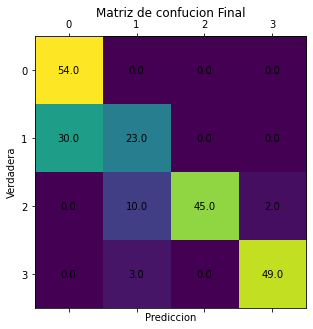

In [ ]:
from sklearn.metrics import confusion_matrix

Precision = precision_score(targetTipoFinal, Y_Prediccion, average='micro')
print(Precision)
CM = confusion_matrix(targetTipoFinal, Y_Prediccion)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(CM)
plt.title('Matriz de confucion Final')
plt.xlabel('Prediccion')
plt.ylabel('Verdadera')
for (i,j), z in np.ndenumerate(CM):
  ax.text(j,i, '{:0.1f}'.format(z),ha = 'center', va = 'center')